In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml

In [ ]:
df = pd.read_csv("bq-results-20220611-194240-1654979511554.csv")
df.head()

,Date,VisitStartTime,UniqueSessionId,User,VisitId,VisitNumber,Source,Medium,Device,OperatingSystem,Browser,Channel,State,Orders,PageViews,Visits,DurationMinutes,Sales
0,20160808,2016-08-08 10:47:20 UTC,00001141565431356831470653240,114156543135683,1470653240,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Istanbul,0,1,1,0.00,0.0
1,20161127,2016-11-27 23:24:48 UTC,0000334710596186211480289088,33471059618621,1480289088,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,1,1,0.00,0.0
2,20161117,2016-11-18 06:19:36 UTC,00004262415776669851479449976,426241577666985,1479449976,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,2,1,0.83,0.0
3,20170317,2017-03-17 18:06:34 UTC,00020567090152690961489773994,2056709015269096,1489773994,1,youtube.com,referral,mobile,Android,Chrome,Social,Istanbul,0,1,1,0.00,0.0
4,20161116,2016-11-16 21:56:38 UTC,00023885405233283761479333398,2388540523328376,1479333398,1,youtube.com,referral,desktop,Windows,Chrome,Social,Izmir,0,1,1,0.00,0.0


In [ ]:
df = df.drop(df.columns[[0, 1, 2, 3,4]], axis=1)  # df.columns is zero-based pd.Index


In [ ]:
df.head(5)

,VisitNumber,Source,Medium,Device,OperatingSystem,Browser,Channel,State,Orders,PageViews,Visits,DurationMinutes,Sales
0,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Istanbul,0,1,1,0.00,0.0
1,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,1,1,0.00,0.0
2,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,2,1,0.83,0.0
3,1,youtube.com,referral,mobile,Android,Chrome,Social,Istanbul,0,1,1,0.00,0.0
4,1,youtube.com,referral,desktop,Windows,Chrome,Social,Izmir,0,1,1,0.00,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20522 entries, 0 to 20521
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VisitNumber      20522 non-null  int64  
 1   Source           20522 non-null  object 
 2   Medium           20522 non-null  object 
 3   Device           20522 non-null  object 
 4   OperatingSystem  20522 non-null  object 
 5   Browser          20522 non-null  object 
 6   Channel          20522 non-null  object 
 7   State            20522 non-null  object 
 8   Orders           20522 non-null  int64  
 9   PageViews        20522 non-null  int64  
 10  Visits           20522 non-null  int64  
 11  DurationMinutes  20522 non-null  float64
 12  Sales            20522 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [ ]:
df1 = df.copy()

In [ ]:
df1["Source"].value_counts()

youtube.com                    16599
google                          1926
(direct)                        1676
Partners                         126
analytics.google.com              72
mail.google.com                   26
google.com                        24
quora.com                         14
siliconvalley.about.com           10
reddit.com                         9
bing                               6
getiriver.com                      5
t.co                               4
baidu                              3
sites.google.com                   2
blog.golang.org                    2
l.facebook.com                     2
github.com                         2
int.search.tb.ask.com              2
facebook.com                       2
docs.google.com                    1
ask                                1
duckduckgo.com                     1
m.facebook.com                     1
search.mysearch.com                1
seroundtable.com                   1
web.telegram.org                   1
g

In [ ]:
df1["Source"].unique()

array(['youtube.com', 'google', '(direct)', 'Partners',
       'analytics.google.com', 'quora.com', 'reddit.com', 'google.com',
       'mail.google.com', 'search.mysearch.com', 'facebook.com', 'baidu',
       'siliconvalley.about.com', 't.co', 'int.search.tb.ask.com',
       'l.facebook.com', 'github.com', 'bing', 'docs.google.com', 'ask',
       'getiriver.com', 'duckduckgo.com', 'blog.golang.org',
       'm.facebook.com', 'sites.google.com', 'seroundtable.com',
       'web.telegram.org', 'googleads.g.doubleclick.net',
       'squishable.com', 'optimize.google.com'], dtype=object)

In [ ]:
sizes = df1["Source"].value_counts()

bad = sizes.index[sizes < 15]

df1.loc[df1["Source"].isin(bad), "Source"] = "other"

#  Visualisation - 1 ######

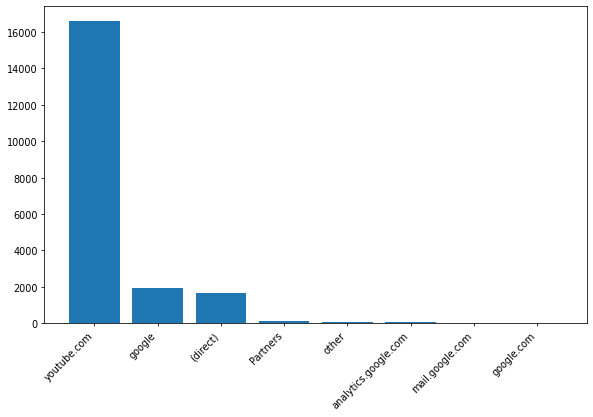

In [ ]:
# Sources:

sources = pd.DataFrame(df1.Source.value_counts(ascending=False))

#Plotting:

plt.figure(figsize=(10,6),dpi=70),
plt.style.use('default')
plt.bar(sources.index,sources.Source)
plt.xticks(rotation=45, ha='right');

In [ ]:
#source = {"youtube.com": 0, "google": 1,"(direct)": 2, "Partners": 3,"analytics.google.com": 4, "other": 5,"google.com": 6, "mail.google.com": 7}
#data = [df1]

#for dataset in data:
    #dataset['Source'] = dataset['Source'].map(source)

In [ ]:
df1.head(5)

,VisitNumber,Source,Medium,Device,OperatingSystem,Browser,Channel,State,Orders,PageViews,Visits,DurationMinutes,Sales
0,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Istanbul,0,1,1,0.00,0.0
1,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,1,1,0.00,0.0
2,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,2,1,0.83,0.0
3,1,youtube.com,referral,mobile,Android,Chrome,Social,Istanbul,0,1,1,0.00,0.0
4,1,youtube.com,referral,desktop,Windows,Chrome,Social,Izmir,0,1,1,0.00,0.0


In [ ]:
df1["Medium"].value_counts()

referral     16784
organic       1892
(none)        1676
affiliate      126
cpc             44
Name: Medium, dtype: int64

In [ ]:
df1["Medium"].unique()

array(['referral', 'organic', '(none)', 'cpc', 'affiliate'], dtype=object)

In [ ]:
df1["OperatingSystem"].unique()

array(['Macintosh', 'Android', 'Windows', 'iOS', 'Linux', 'Samsung',
       'Windows Phone', '(not set)', 'BlackBerry', 'Chrome OS'],
      dtype=object)

In [ ]:
df1["OperatingSystem"].value_counts()

Windows          10942
Macintosh         7865
Android           1090
iOS                439
Linux              101
(not set)           42
Windows Phone       20
Samsung             11
Chrome OS           11
BlackBerry           1
Name: OperatingSystem, dtype: int64

#  Visualisation - 2 ######

In [ ]:
sizes = df1["OperatingSystem"].value_counts()

bad = sizes.index[sizes < 41]

df1.loc[df1["OperatingSystem"].isin(bad), "OperatingSystem"] = "(not set)"

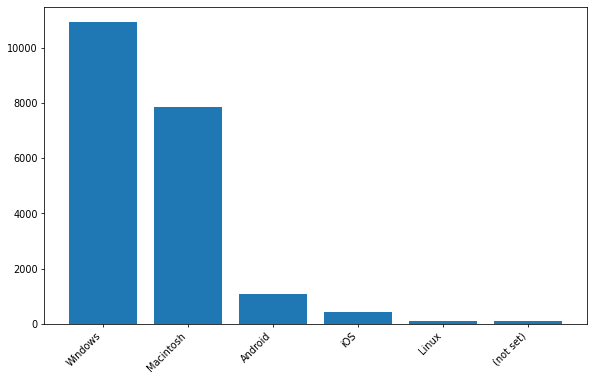

In [ ]:
# Operating systems:

systems = pd.DataFrame(df1.OperatingSystem.value_counts(ascending=False))

#Plotting:

plt.figure(figsize=(10,6),dpi=70),
plt.style.use('default')
plt.bar(systems.index,systems.OperatingSystem)
plt.xticks(rotation=45, ha='right');

#  Visualisation - 3 ######

In [ ]:
sizes = df1["Browser"].value_counts()

bad = sizes.index[sizes < 50]

df1.loc[df1["Browser"].isin(bad), "Browser"] = "other"

In [ ]:
df1

,VisitNumber,Source,Medium,Device,OperatingSystem,Browser,Channel,State,Orders,PageViews,Visits,DurationMinutes,Sales
0,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Istanbul,0,1,1,0.00,0.0
1,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,1,1,0.00,0.0
2,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,2,1,0.83,0.0
3,1,youtube.com,referral,mobile,Android,Chrome,Social,Istanbul,0,1,1,0.00,0.0
4,1,youtube.com,referral,desktop,Windows,Chrome,Social,Izmir,0,1,1,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20517,1,youtube.com,referral,desktop,Windows,Chrome,Social,not available in demo dataset,0,1,1,0.00,0.0
20518,1,youtube.com,referral,desktop,Windows,Chrome,Social,not available in demo dataset,0,1,1,0.00,0.0
20519,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Izmir,0,2,1,0.85,0.0
20520,1,youtube.com,referral,desktop,Windows,Chrome,Social,Antalya,0,1,1,0.00,0.0


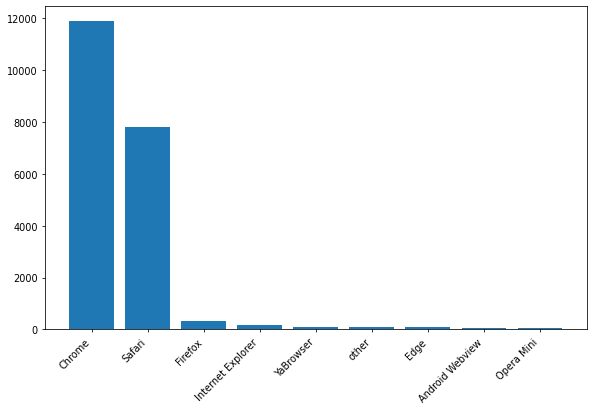

In [ ]:
#Browsers:

browsers = pd.DataFrame(df1.Browser.value_counts(ascending=False))


#Plotting:

plt.figure(figsize=(10,6),dpi=70),
plt.style.use('default')
plt.bar(browsers.index,browsers.Browser)
plt.xticks(rotation=45, ha='right');

# Visualisation - 4 ###

In [ ]:
sizes = df1["State"].value_counts()

bad = sizes.index[sizes < 100]

df1.loc[df1["State"].isin(bad), "State"] = "Random Cities"

In [ ]:
# Dropping not available in demo dataset:

In [ ]:
df1.drop(df1.index[df1['State'] =='not available in demo dataset'],inplace = True)

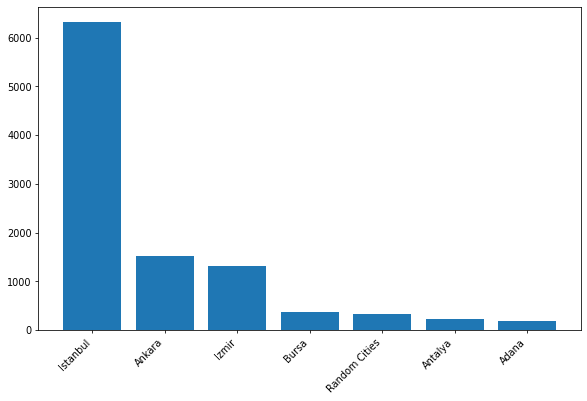

In [ ]:
#Browsers:

states = pd.DataFrame(df1.State.value_counts(ascending=False))


#Plotting:

plt.figure(figsize=(10,6),dpi=70),
plt.style.use('default')
plt.bar(states.index,states.State)
plt.xticks(rotation=45, ha='right');

In [ ]:
df1.head(5)

,VisitNumber,Source,Medium,Device,OperatingSystem,Browser,Channel,State,Orders,PageViews,Visits,DurationMinutes,Sales
0,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Istanbul,0,1,1,0.00,0.0
1,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,1,1,0.00,0.0
2,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,2,1,0.83,0.0
3,1,youtube.com,referral,mobile,Android,Chrome,Social,Istanbul,0,1,1,0.00,0.0
4,1,youtube.com,referral,desktop,Windows,Chrome,Social,Izmir,0,1,1,0.00,0.0


# df_Kmeans

In [ ]:
df_Kmeans = pd.get_dummies(df1, columns=["Source","Medium","Device","OperatingSystem","Browser","Channel","State"])


In [ ]:
df_Kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10271 entries, 0 to 20520
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VisitNumber                  10271 non-null  int64  
 1   Orders                       10271 non-null  int64  
 2   PageViews                    10271 non-null  int64  
 3   Visits                       10271 non-null  int64  
 4   DurationMinutes              10271 non-null  float64
 5   Sales                        10271 non-null  float64
 6   Source_(direct)              10271 non-null  uint8  
 7   Source_Partners              10271 non-null  uint8  
 8   Source_analytics.google.com  10271 non-null  uint8  
 9   Source_google                10271 non-null  uint8  
 10  Source_google.com            10271 non-null  uint8  
 11  Source_mail.google.com       10271 non-null  uint8  
 12  Source_other                 10271 non-null  uint8  
 13  Source_youtube.c

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df_Kmeans)

In [ ]:
df_std = pd.DataFrame(data = df_std,columns = df_Kmeans.columns)


In [ ]:
dict = {}
for i in range(1,10):
  num_clusters = i
  km = KMeans(n_clusters=num_clusters)
  km.fit(df_std)
  #display_cluster(X,km,num_clusters)
  print(km.inertia_)
  dict.update({i:km.inertia_})

28609.71094577968
19614.24895889105
13119.709440546456
11258.608140749413
9838.641539556142
8631.760196654766
8004.701917826011
7598.506259819445
6877.662344303202


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]
sns.set_style("whitegrid")
sns.set_context("talk")

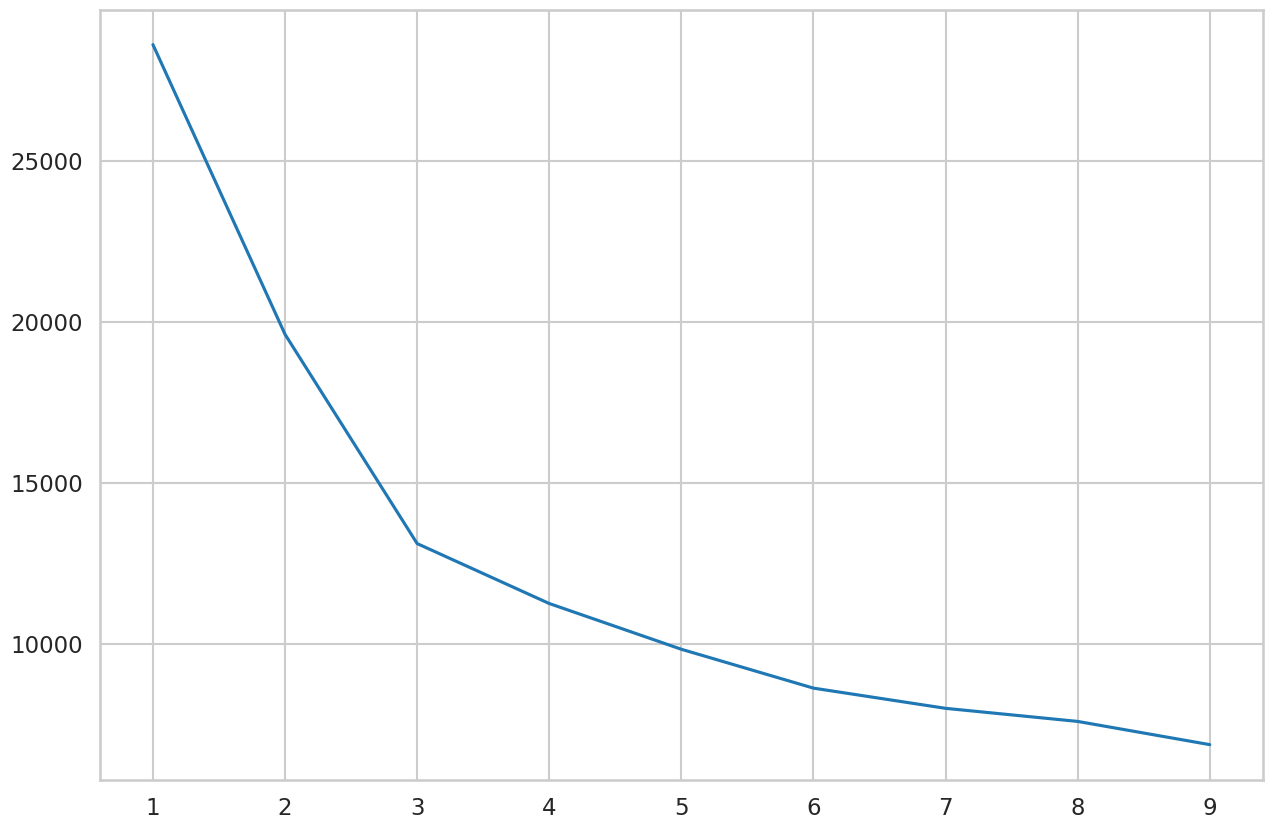

In [ ]:
myList = dict.items()
x, y = zip(*myList) 

plt.plot(x, y)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)


In [ ]:
kmeans.fit(df_std)


KMeans(n_clusters=6, random_state=42)

In [ ]:
df_std.head(5)

,VisitNumber,Orders,PageViews,Visits,DurationMinutes,Sales,Source_(direct),Source_Partners,Source_analytics.google.com,Source_google,...,Channel_Referral,Channel_Social,State_Adana,State_Ankara,State_Antalya,State_Bursa,State_Istanbul,State_Izmir,State_Random Cities,State_not available in demo dataset
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.009615,0.0,0.009962,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_segm_kmeans= df_std.copy()
df_std["Segment"] = kmeans.labels_

In [ ]:
df_segm_analysis = df_std.groupby(['Segment']).mean()
df_segm_analysis

,VisitNumber,Orders,PageViews,Visits,DurationMinutes,Sales,Source_(direct),Source_Partners,Source_analytics.google.com,Source_google,...,Channel_Paid Search,Channel_Referral,Channel_Social,State_Adana,State_Ankara,State_Antalya,State_Bursa,State_Istanbul,State_Izmir,State_Random Cities
Segment,,,,,,,,,,,,,,,,,,,,,
0,0.013761,0.000000,0.005362,0.0,0.006791,0.000000,0.000000,0.001617,0.001078,0.000000,...,0.000000,0.002156,0.996226,0.046361,0.377898,0.055526,0.097574,0.000000,0.335310,0.087332
1,0.000086,0.000000,0.005724,0.0,0.006248,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001626,0.998374,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,0.017635,0.000000,0.026860,0.0,0.029644,0.000000,0.911826,0.082988,0.000000,0.000000,...,0.016598,0.020747,0.000000,0.009336,0.079876,0.008299,0.010373,0.828838,0.048755,0.014523
3,0.011743,0.000000,0.005989,0.0,0.007291,0.000000,0.000000,0.000000,0.016881,0.000000,...,0.000000,0.033761,0.966239,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,0.000330,0.000000,0.005728,0.0,0.006801,0.000000,0.000000,0.000941,0.000314,0.000941,...,0.000941,0.001254,0.996864,0.028849,0.205080,0.031985,0.056444,0.632173,0.000000,0.045469
5,0.013856,0.002167,0.031636,0.0,0.031279,0.001383,0.000000,0.000000,0.000000,0.991333,...,0.014085,0.000000,0.000000,0.001083,0.084507,0.019502,0.007584,0.843987,0.040087,0.003250


In [ ]:
df_segm_analysis = df_segm_analysis.reset_index()

In [ ]:
source = {0: "At Risk", 1: "Promising",2: "Potential Loyalists", 3: "Loyal Customers",4: "Can\'t Loose", 5: "No matter what Keep Them!"}
data = [df_segm_analysis]

for dataset in data:
    dataset['Segment'] = dataset['Segment'].map(source)

In [ ]:
df_segm_analysis.head(10)

,Segment,VisitNumber,Orders,PageViews,Visits,DurationMinutes,Sales,Source_(direct),Source_Partners,Source_analytics.google.com,...,Channel_Paid Search,Channel_Referral,Channel_Social,State_Adana,State_Ankara,State_Antalya,State_Bursa,State_Istanbul,State_Izmir,State_Random Cities
0,At Risk,0.013761,0.000000,0.005362,0.0,0.006791,0.000000,0.000000,0.001617,0.001078,...,0.000000,0.002156,0.996226,0.046361,0.377898,0.055526,0.097574,0.000000,0.335310,0.087332
1,Promising,0.000086,0.000000,0.005724,0.0,0.006248,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001626,0.998374,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,Potential Loyalists,0.017635,0.000000,0.026860,0.0,0.029644,0.000000,0.911826,0.082988,0.000000,...,0.016598,0.020747,0.000000,0.009336,0.079876,0.008299,0.010373,0.828838,0.048755,0.014523
3,Loyal Customers,0.011743,0.000000,0.005989,0.0,0.007291,0.000000,0.000000,0.000000,0.016881,...,0.000000,0.033761,0.966239,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,Can't Loose,0.000330,0.000000,0.005728,0.0,0.006801,0.000000,0.000000,0.000941,0.000314,...,0.000941,0.001254,0.996864,0.028849,0.205080,0.031985,0.056444,0.632173,0.000000,0.045469
5,No matter what Keep Them!,0.013856,0.002167,0.031636,0.0,0.031279,0.001383,0.000000,0.000000,0.000000,...,0.014085,0.000000,0.000000,0.001083,0.084507,0.019502,0.007584,0.843987,0.040087,0.003250


# Gower

In [ ]:
import gower

distance_matrix = gower.gower_matrix(df1)

In [ ]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.5, 
                        min_samples=8, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
df1["cluster"] = dbscan_cluster.labels_

In [ ]:
df1.cluster.value_counts()

0    20522
Name: cluster, dtype: int64

# Non-dummies

In [ ]:
df1.head(5)

,VisitNumber,Source,Medium,Device,OperatingSystem,Browser,Channel,State,Orders,PageViews,Visits,DurationMinutes,Sales,cluster
0,1,youtube.com,referral,desktop,Macintosh,Safari,Social,Istanbul,0,1,1,0.00,0.0,0
1,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,1,1,0.00,0.0,0
2,1,youtube.com,referral,desktop,Macintosh,Safari,Social,not available in demo dataset,0,2,1,0.83,0.0,0
3,1,youtube.com,referral,mobile,Android,Chrome,Social,Istanbul,0,1,1,0.00,0.0,0
4,1,youtube.com,referral,desktop,Windows,Chrome,Social,Izmir,0,1,1,0.00,0.0,0


In [ ]:
df1.Sales.value_counts()

0.00     20520
91.95        1
25.46        1
Name: Sales, dtype: int64

In [ ]:
df2 = df1.filter(["VisitNumber", "PageViews","DurationMinutes"])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2_std = scaler.fit_transform(df2)

In [ ]:
df2_std = pd.DataFrame(data = df2_std,columns = df2.columns)


In [ ]:
dict = {}
for i in range(1,10):
  num_clusters = i
  km = KMeans(n_clusters=num_clusters)
  km.fit(df_std)
  #display_cluster(X,km,num_clusters)
  print(km.inertia_)
  dict.update({i:km.inertia_})

90441.53686512486
59352.098270341914
40214.71983706961
29986.472161821217
20596.12751396775
18149.257324856364
16730.002311771175
15723.328101126186
14233.83147642172


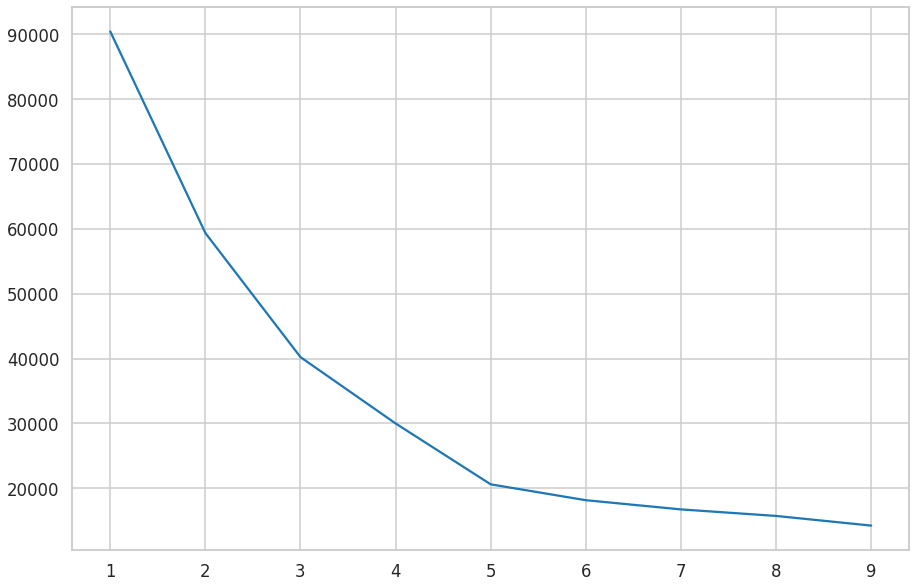

In [ ]:
myList = dict.items()
x, y = zip(*myList) 

plt.plot(x, y)
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)


In [ ]:
kmeans.fit(df2_std)


KMeans(n_clusters=5, random_state=42)

In [ ]:
df2_segm_kmeans= df2_std.copy()
df2_std["Segment"] = kmeans.labels_

In [ ]:
df2_std

,VisitNumber,PageViews,DurationMinutes,Segment
0,-0.194125,-0.275423,-0.244890,0
1,-0.194125,-0.275423,-0.244890,0
2,-0.194125,0.105019,0.082435,0
3,-0.194125,-0.275423,-0.244890,0
4,-0.194125,-0.275423,-0.244890,0
...,...,...,...,...
20517,-0.194125,-0.275423,-0.244890,0
20518,-0.194125,-0.275423,-0.244890,0
20519,-0.194125,0.105019,0.090322,0
20520,-0.194125,-0.275423,-0.244890,0


In [ ]:
df2_segm_analysis = df2_std.groupby(['Segment']).mean()
df2_segm_analysis

,VisitNumber,PageViews,DurationMinutes
Segment,,,
0,-0.107905,-0.107208,-0.108731
1,0.079669,4.760395,2.216276
2,6.102956,0.000515,-0.007259
3,0.498587,1.941635,8.159329
4,3.488795,20.268436,16.778853


In [ ]:
df2_segm_analysis = df2_segm_analysis.reset_index()

In [ ]:
df2_segm_analysis.head()

,Segment,VisitNumber,PageViews,DurationMinutes
0,0,-0.107905,-0.107208,-0.108731
1,1,0.079669,4.760395,2.216276
2,2,6.102956,0.000515,-0.007259
3,3,0.498587,1.941635,8.159329
4,4,3.488795,20.268436,16.778853


In [ ]:
df2_segm_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Segment          5 non-null      int64  
 1   VisitNumber      5 non-null      float64
 2   PageViews        5 non-null      float64
 3   DurationMinutes  5 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 288.0 bytes


In [ ]:
source = {0: "At Risk", 1: "Promising",2: "Potential Loyalists", 3: "Loyal Customers",4: "Can\'t Loose"}
data = [df2_segm_analysis]

for dataset in data:
    dataset['Segment'] = dataset['Segment'].map(source)

In [ ]:
df2_segm_analysis.head()

,Segment,VisitNumber,PageViews,DurationMinutes
0,At Risk,-0.107905,-0.107208,-0.108731
1,Promising,0.079669,4.760395,2.216276
2,Potential Loyalists,6.102956,0.000515,-0.007259
3,Loyal Customers,0.498587,1.941635,8.159329
4,Can't Loose,3.488795,20.268436,16.778853
